In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X = titanic_data.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [4]:
Y = titanic_data['Survived']

In [5]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [6]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [7]:
age_median = X.Age.median()
age_median
X= X.fillna({'Age': age_median})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
d_tree = clf.fit(X, Y)

[Text(207.69871176861702, 212.004, 'X[5] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(132.61311502659575, 201.132, 'X[4] <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(67.03234707446809, 190.26, 'X[1] <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(26.71276595744681, 179.388, 'X[2] <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(24.338297872340426, 168.516, 'X[3] <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(21.963829787234044, 157.644, 'X[4] <= 15.015\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(19.58936170212766, 146.772, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(24.338297872340426, 146.772, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(26.71276595744681, 157.644, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(29.08723404255319, 168.516, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(107.35192819148936, 179.388, 'X[7] <= 0.5\nentropy = 0.477\nsa

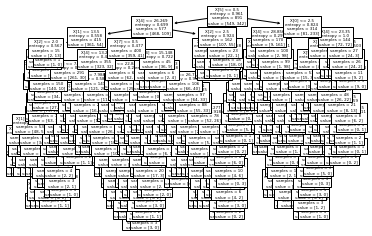

In [9]:
tree.plot_tree(d_tree, fontsize = 4)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state= 42)

In [12]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [13]:
X_train.shape

(596, 10)

In [14]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
720,2,6.0,0,1,33.0000,1,0,0,0,1
39,3,14.0,1,0,11.2417,1,0,1,0,0


In [15]:
X_test.shape

(295, 10)

In [16]:
clf.score(X, Y)

0.9797979797979798

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.8238255033557047

In [19]:
clf.score(X_test, Y_test)

0.8203389830508474

In [22]:
scores_data = pd.DataFrame
max_depth_values = range(1, 100)
from sklearn.model_selection import cross_val_score

In [23]:
scores_data = pd.DataFrame
max_depth_values = range(1, 100)
cross_val_scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, Y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    cross_val_scores_data = cross_val_scores_data.append(temp_score_data)

In [24]:
cross_val_scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.796942


In [26]:
scores_data_long = pd.melt(cross_val_scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


,max_depth,set_type,score
206,9,cross_val_score,0.807068
207,10,cross_val_score,0.803650
211,14,cross_val_score,0.801955
208,11,cross_val_score,0.798565
203,6,cross_val_score,0.797069


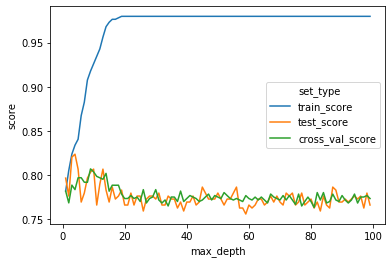

In [27]:
sns.lineplot(x = 'max_depth', y = 'score', data = scores_data_long, hue='set_type')

In [75]:

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 2)
cross_val_score(clf, X_train, Y_train, cv=5).mean()

0.7685529126905

In [34]:
scores_data_long[scores_data_long['set_type'] == 'cross_val_score'].sort_values('score', ascending=False).head()

,max_depth,set_type,score
206,9,cross_val_score,0.807068
207,10,cross_val_score,0.803650
211,14,cross_val_score,0.801955
208,11,cross_val_score,0.798565
203,6,cross_val_score,0.797069


[Text(157.20975836431228, 206.56799999999998, 'X[5] <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(63.008364312267666, 184.824, 'X[1] <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(20.536059479553906, 163.07999999999998, 'X[2] <= 3.0\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(15.557620817843867, 141.336, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(25.514498141263942, 141.336, 'X[1] <= 2.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(20.536059479553906, 119.592, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(30.49293680297398, 119.592, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(105.48066914498142, 163.07999999999998, 'X[4] <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(45.428252788104096, 141.336, 'X[4] <= 36.877\nentropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(40.44981412639405, 119.592, 'X[0] <= 1.5\nentropy = 0.601\nsamples = 314\nvalue = [268, 46]'),
 Text(9.956

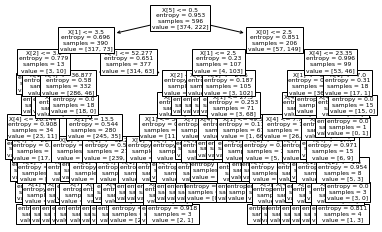

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)
best_fit = clf.fit(X_train, Y_train)
tree.plot_tree(best_fit, fontsize = 6)

In [37]:
clf.score(X_test, Y_test)

0.8033898305084746

In [38]:
clf.score(X_train, Y_train)

0.9177852348993288